<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 26.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
%matplotlib inline
import seaborn as sns
assert sns.__version__ == '0.9.0'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:

income_url='https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv'
lifespan_url='https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv'
population_url='https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv'
entities_url='https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv'
concepts_url='https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv'

income = pd.read_csv(income_url)
lifespan = pd.read_csv(lifespan_url)
population = pd.read_csv(population_url)
entities = pd.read_csv(entities_url)
concepts = pd.read_csv(concepts_url)

In [0]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

# Merge Data

In [0]:
df = pd.merge(income, lifespan)
variables = ['country', 'name', 'world_6region']
df = pd.merge(df, population)

In [10]:
# entities[entities.country=='abw'].T

# Preview
pd.merge(df, entities[variables], 
         how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


In [11]:
df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 6)

In [12]:
df.head()

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


# explore 

In [13]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Sao Tome and Principe,europe_central_asia
freq,219,10991


In [14]:
# df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [15]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


# plot

In [16]:
now = df[df.year==2018]
print(now.shape)
now.sample(10)

(188, 6)


,year,income,lifespan,population,country,region
19187,2018,8452,76.65,9903802,Jordan,middle_east_north_africa
17873,2018,17402,76.47,82011735,Iran,middle_east_north_africa
38723,2018,2780,65.46,59091392,Tanzania,sub_saharan_africa
6882,2018,57133,83.45,8544034,Switzerland,europe_central_asia
30622,2018,1387,71.13,25610672,North Korea,east_asia_pacific
6444,2018,689,51.58,4737423,Central African Republic,sub_saharan_africa
218,2018,39219,76.14,105670,Aruba,america
14813,2018,20459,66.13,1313894,Equatorial Guinea,sub_saharan_africa
28213,2018,64846,82.39,5353363,Norway,europe_central_asia
39818,2018,6688,70.50,32364996,Uzbekistan,europe_central_asia


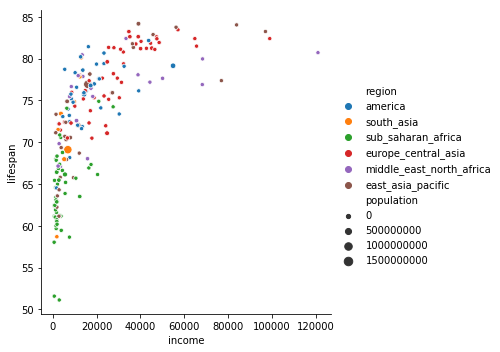

In [17]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now);

# analyze outliers

In [19]:
now[now.income > 80000]

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [20]:
entities[entities.name=='Macao, China'].T

,145
country,mac
alt_5,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA
alternative_1,Macau
alternative_2,Macao
alternative_3,"China, Macao SAR"
alternative_4_cdiac,Macau
arb1,"Macao SAR, China"
arb2,NaN
arb3,NaN
arb4,NaN


In [0]:
qatar = now[now.country=='Qatar']

qatar_income = qatar.income.values[0]

qatar_lifespan = qatar.lifespan.values[0]

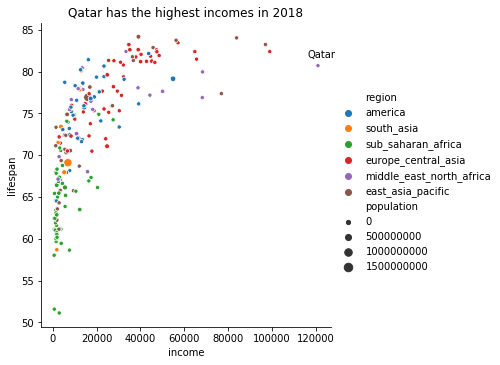

In [28]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')

plt.title('Qatar has the highest incomes in 2018');

# plot multiple years

In [32]:
years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]

centuries[centuries.country=='Afghanistan'].head()

,year,income,lifespan,population,country,region
237,1818,604,28.03,3308390,Afghanistan,south_asia
337,1918,849,7.89,5704092,Afghanistan,south_asia
437,2018,1867,58.69,36373176,Afghanistan,south_asia


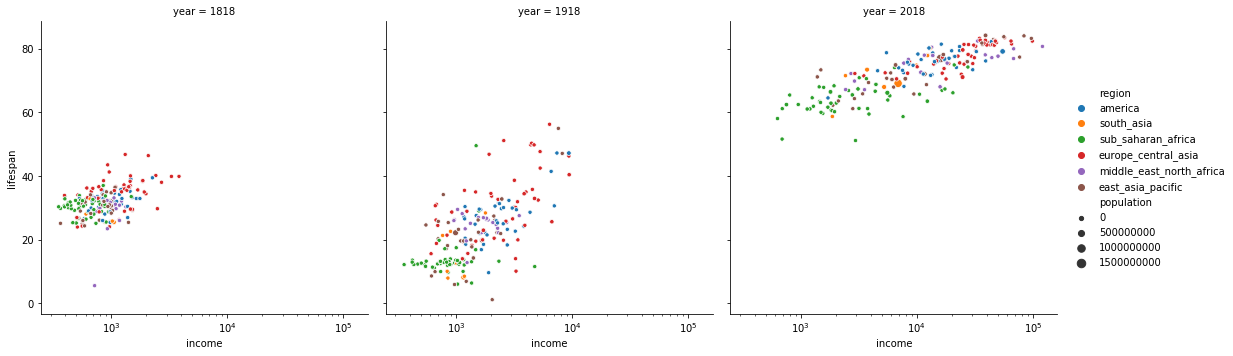

In [37]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', col='year', data=centuries); 

plt.xscale('log');

## consistent countries per year? 

In [38]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [40]:
centuries.groupby('country').year.count().head()

country
Afghanistan            3
Albania                3
Algeria                3
Angola                 3
Antigua and Barbuda    3
Name: year, dtype: int64

# point out a story

(150, 150000)

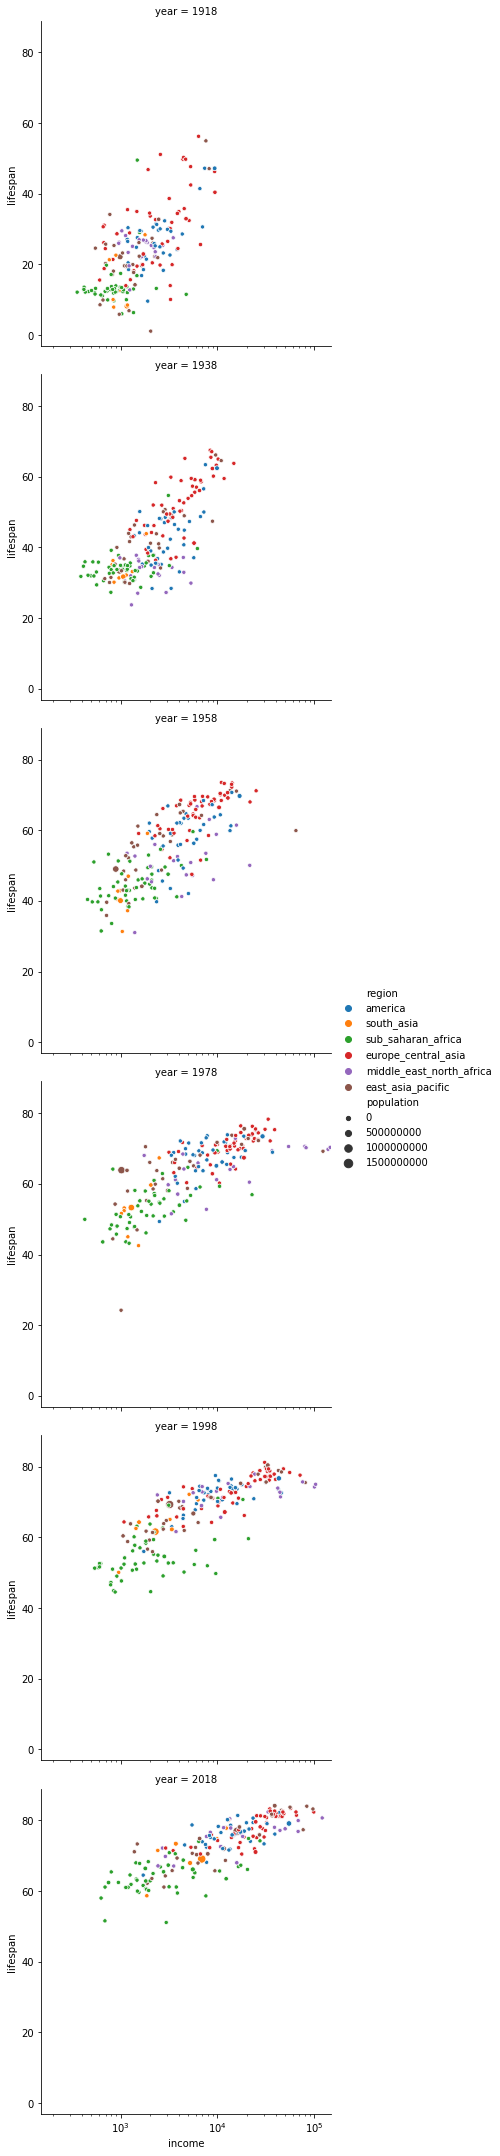

In [42]:
years2 = [1918, 1938, 1958, 1978, 1998, 2018]

subset = df[df.year.isin(years2)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=subset, row='year')

plt.xscale('log')
plt.xlim(150,150000)

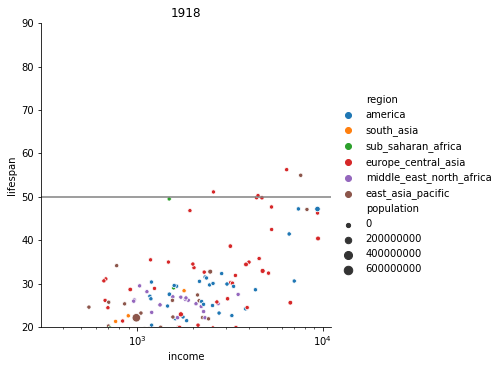

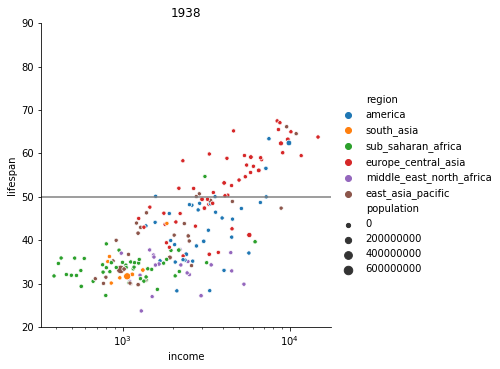

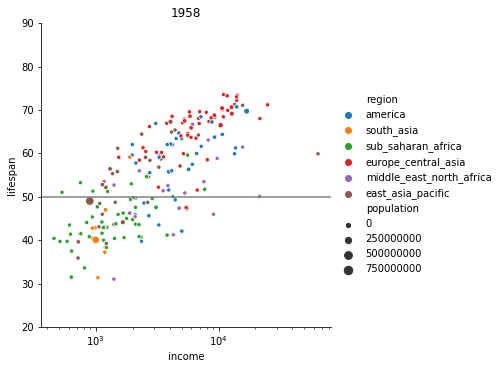

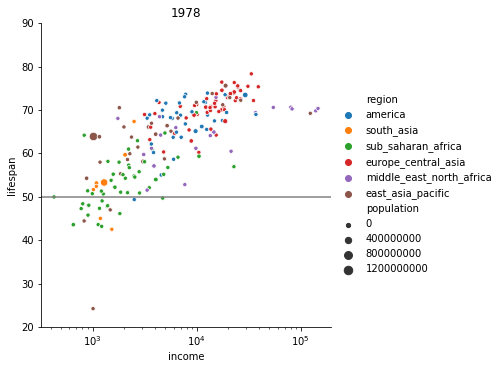

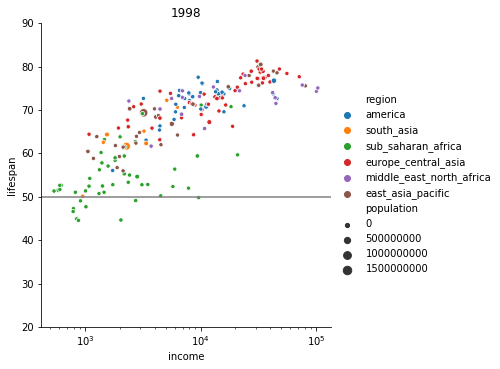

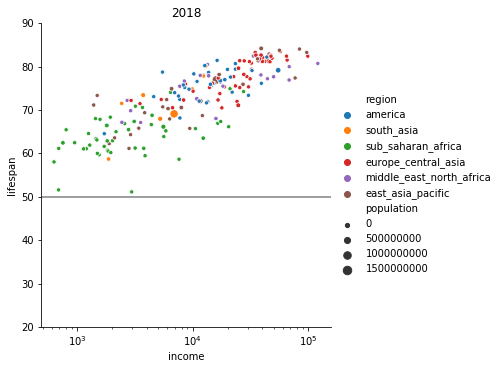

In [44]:
for year in years2:
  sns.relplot(x='income', y='lifespan', hue='region', size='population', 
              data=df[df.year==year])
  
  plt.xscale('log')
  plt.ylim(20,90)
  plt.title(year)
  plt.axhline(y=50, color='grey')


#### 100 years ago few countries had lifespans *above* 50 years

In [50]:
df[(df.year==1918) & (df.lifespan>=50)]

,year,income,lifespan,population,country,region
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia
18211,1918,2576,51.11,115504,Iceland,europe_central_asia
28113,1918,4479,50.28,2576646,Norway,europe_central_asia


#### today, no countries have lifespans *below* 50 years

In [49]:
df[(df.year==2018) & (df.lifespan<=50)]

,year,income,lifespan,population,country,region


# interactive (colab)